In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\prateek\appdata\local\programs\python\python37\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Let's look at the distibution of our target variable(Purchase amount)

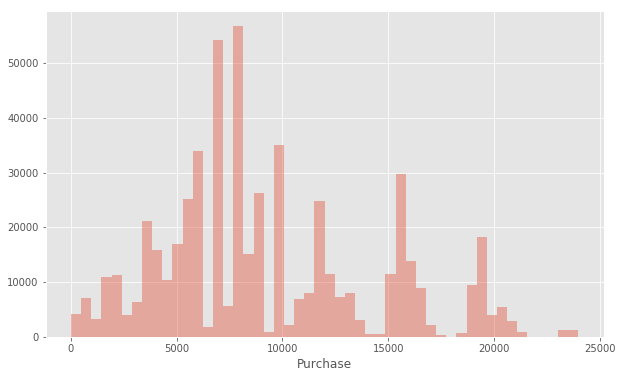

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
sns.distplot(train.Purchase, bins=50, kde=False)

### Looks like the distribution has a positive skew i.e, has a long tail towards right.

## Now let's explore categoricals like Gender, Age, City etc

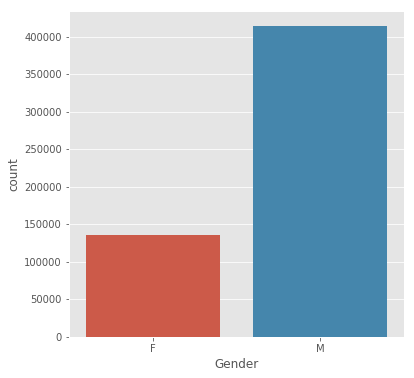

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(train.Gender)

### More male customers than female cutomers.

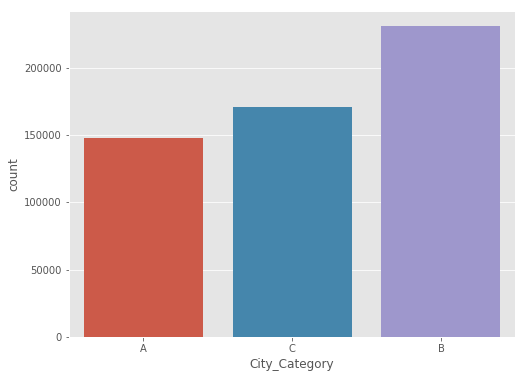

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(train.City_Category)

### More customers belong to city B than city C than city A.

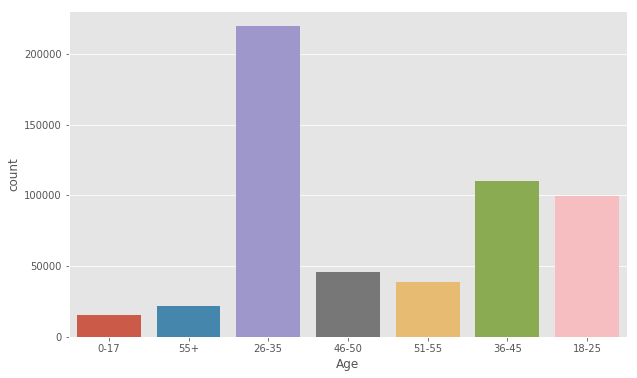

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(train.Age)

### A vast majority of customers belong to the age group of 26-35 years, followed by 36-45 years and 18-25 years.

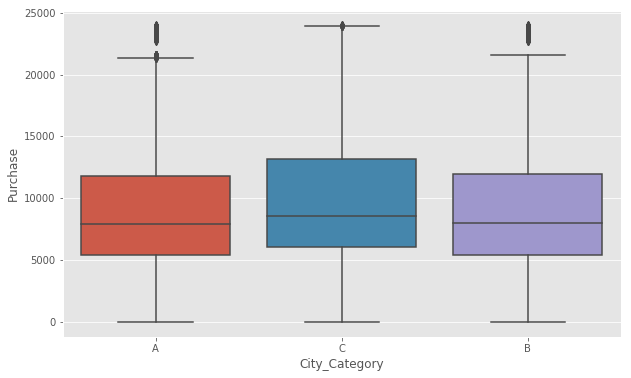

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x=train.City_Category, y=train.Purchase)

### Ths boxplot shows that the customers belonging to city C tend to shop for slightly higher amounts than those belonging to cities A and B.

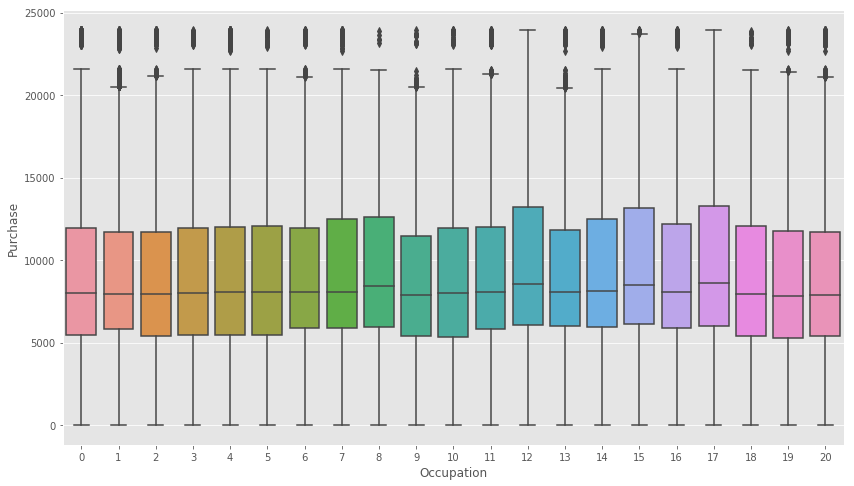

In [11]:
plt.figure(figsize=(14,8))
sns.boxplot(x=train.Occupation, y=train.Purchase)

### This boxplot shows that customers indulged in different professions shop for more or less similar amounts. Therefore, customer's occupation have little to do with how much they're going to spend.

In [12]:
pd.DataFrame(train.isnull().sum(), columns=['Missing Values'])

,Missing Values
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


In [13]:
pd.DataFrame(test.isnull().sum(), columns=['Missing Values'])

,Missing Values
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,72344


In [14]:
purchase = train.Purchase

In [15]:
train.drop('Purchase', axis=1, inplace=True)

In [16]:
train.fillna(0, inplace=True) #Filling missing product categories with 0.
test.fillna(0, inplace=True)

In [17]:
all_data = pd.concat([train, test], axis=0).reset_index(drop=True)

In [18]:
alldata = all_data.copy()

In [19]:
all_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label_enc = LabelEncoder()

In [22]:
for col in ('User_ID', 'Product_ID', 'Gender', 'Age', 'Stay_In_Current_City_Years'): #Encoding the variables.
    all_data[col] = label_enc.fit_transform(all_data[col])  

In [23]:
all_data.dtypes

User_ID                         int64
Product_ID                      int32
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [24]:
all_data = pd.get_dummies(all_data, columns=['City_Category'], drop_first=True) #Encoding categoricals

In [25]:
training = all_data[:len(train)] 
testing = all_data[len(train):]

## Feature engineering

In [26]:
map_usercount = training.User_ID.value_counts().to_dict() #For Creating a new feature, user_count

In [27]:
training['User_count'] = training['User_ID'].map(map_usercount)
testing['User_count'] = testing['User_ID'].map(map_usercount)

c:\users\prateek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\prateek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
map_productcounts = training.Product_ID.value_counts().to_dict() #For Creating a new feature, product_count

In [29]:
training['Product_count'] = training['Product_ID'].map(map_usercount)
testing['Product_count'] = testing['Product_ID'].map(map_usercount)

c:\users\prateek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\prateek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
training.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_B,City_Category_C,User_count,Product_count
0,0,684,0,0,10,2,0,3,0.0,0.0,0,0,35,77
1,0,2406,0,0,10,2,0,1,6.0,14.0,0,0,35,158
2,0,868,0,0,10,2,0,12,0.0,0.0,0,0,35,39
3,0,844,0,0,10,2,0,12,14.0,0.0,0,0,35,20
4,1,2769,1,6,16,4,0,8,0.0,0.0,0,1,77,217


In [31]:
training['Purchase'] = purchase

c:\users\prateek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
map_purchase_mean_by_userId = training.groupby('User_ID')['Purchase'].mean().to_dict() #For mapping mean purchase amount by userId
map_purchase_mean_by_productId = training.groupby('Product_ID')['Purchase'].mean().to_dict() #For mapping mean purchase amount by productId

In [33]:
training['Purchase_mean_by_UserId'] = training['User_ID'].map(map_purchase_mean_by_userId)
testing['Purchase_mean_by_UserId'] = testing['User_ID'].map(map_purchase_mean_by_userId)

training['Purchase_mean_by_ProductId'] = training['Product_ID'].map(map_purchase_mean_by_userId)
testing['Purchase_mean_by_ProductId'] = testing['Product_ID'].map(map_purchase_mean_by_userId)

c:\users\prateek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\prateek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\prateek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [34]:
training.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_B,City_Category_C,User_count,Product_count,Purchase,Purchase_mean_by_UserId,Purchase_mean_by_ProductId
0,0,684,0,0,10,2,0,3,0.0,0.0,0,0,35,77,8370,9545.514286,7474.584416
1,0,2406,0,0,10,2,0,1,6.0,14.0,0,0,35,158,15200,9545.514286,9205.392405
2,0,868,0,0,10,2,0,12,0.0,0.0,0,0,35,39,1422,9545.514286,7222.948718
3,0,844,0,0,10,2,0,12,14.0,0.0,0,0,35,20,1057,9545.514286,6520.150000
4,1,2769,1,6,16,4,0,8,0.0,0.0,0,1,77,217,7969,10525.610390,6934.142857


In [35]:
training.drop('Purchase', axis=1, inplace=True)

c:\users\prateek\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [36]:
from sklearn.model_selection import cross_val_score

In [38]:
from xgboost import XGBRegressor

In [39]:
xgboost = XGBRegressor(max_depth=12, learning_rate=0.05, n_estimators=350, colsample_bytree=0.6)

In [41]:
error = cross_val_score(xgboost, X=training, y=purchase, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [44]:
error = -error

In [48]:
rmse = np.sqrt(np.mean(error))

In [52]:
print('The root mean squared error is : ',np.round(rmse,2))

The root mean squared error is :  2487.09


In [40]:
xgboost.fit(training,purchase)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=12, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [54]:
predictions = pd.DataFrame(xgboost.predict(testing), columns=['Purchase'])

In [57]:
pd.concat([test.User_ID, test.Product_ID, predictions], axis=1).reset_index(drop=True).to_csv('Black Friday Sales Solution.csv', index=False)

In [58]:
#Leaderboard Rank: 123/1432